In [411]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# import lazypredict

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [412]:
df_ger = pd.read_csv('Data/Germany.csv',  index_col='Year')
df_ger # the one with categorical variable for Germany

,Country,ISO 3166-1 alpha-3,Total,Coal,Oil,Gas
Year,,,,,,
1980,Germany,DEU,1100.065995,551.175520,412.456480,115.452640
1981,Germany,DEU,1048.523357,557.748736,361.299712,110.000608
1982,Germany,DEU,1015.733894,550.812784,344.463632,102.016752
1983,Germany,DEU,1011.604905,553.738320,333.397148,106.021121
1984,Germany,DEU,1033.244579,572.331456,334.889600,108.531344
1985,Germany,DEU,1044.117955,579.375692,340.221911,108.531724
1986,Germany,DEU,1047.471904,573.762079,356.828387,100.550801
1987,Germany,DEU,1032.442842,560.223918,345.534743,109.546660
1988,Germany,DEU,1029.024130,552.860960,351.260352,107.637328


In [413]:
# Drop the categorial variables
df= df_ger.select_dtypes(include=['float64'])
df

,Total,Coal,Oil,Gas
Year,,,,
1980,1100.065995,551.175520,412.456480,115.452640
1981,1048.523357,557.748736,361.299712,110.000608
1982,1015.733894,550.812784,344.463632,102.016752
1983,1011.604905,553.738320,333.397148,106.021121
1984,1033.244579,572.331456,334.889600,108.531344
1985,1044.117955,579.375692,340.221911,108.531724
1986,1047.471904,573.762079,356.828387,100.550801
1987,1032.442842,560.223918,345.534743,109.546660
1988,1029.024130,552.860960,351.260352,107.637328


In [414]:
#  plot to see total emission versus year for 'Germany'
fig_ger = px.line(df, x=df.index, y="Total")
fig_ger.update_xaxes(rangeslider_visible=True)
fig_ger.show()

Visualize the time series

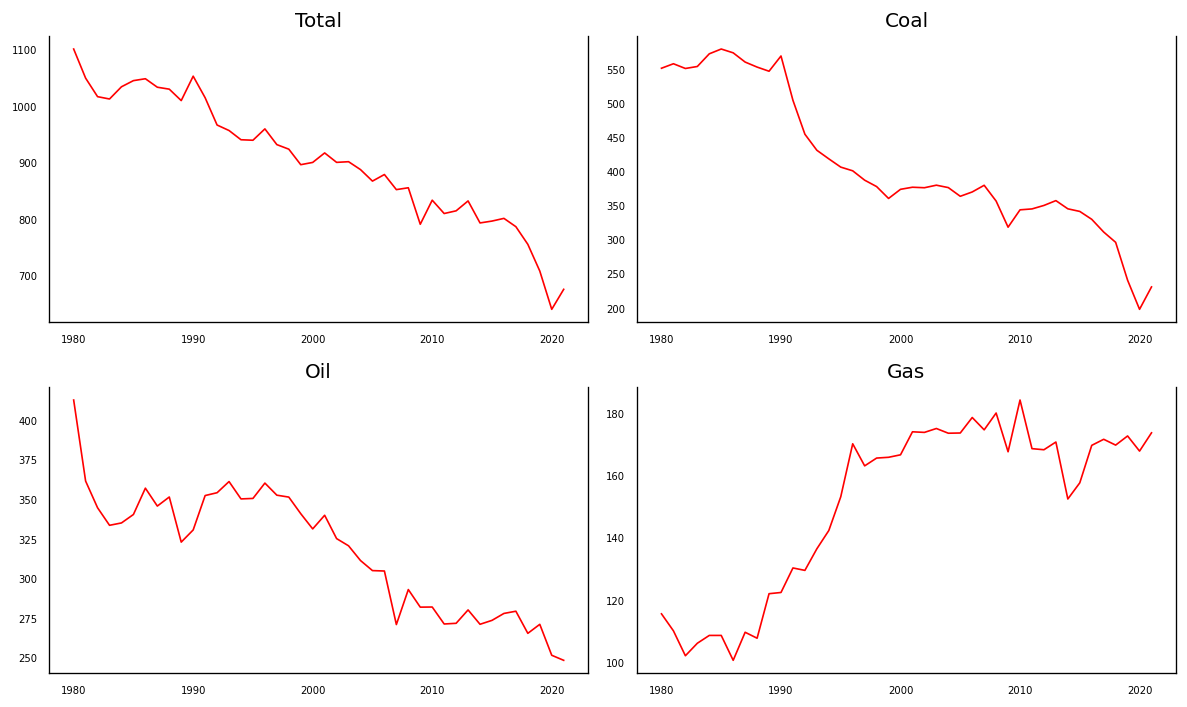

In [415]:
# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

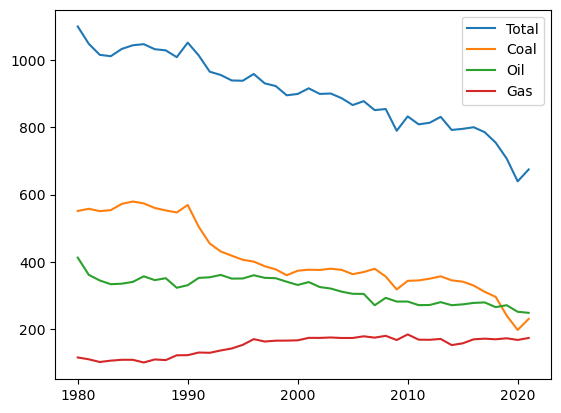

In [416]:
plt.figure()

x = df.index
y1 = df['Total']
y2 = df['Coal']
y3 = df['Oil']
y4 = df['Gas']






plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)




plt.legend(['Total', 'Coal', 'Oil', 'Gas'])

Grainger's Causality Test

In [417]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)   

,Total_x,Coal_x,Oil_x,Gas_x
Total_y,1.0,0.0,0.0,0.0
Coal_y,0.0,1.0,0.0,0.0
Oil_y,0.0,0.0,1.0,0.0
Gas_y,0.0,0.0,0.0,1.0


 Cointegration Test

In [418]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Total  ::  116.48    > 40.1749   =>   True
Coal   ::  59.99     > 24.2761   =>   True
Oil    ::  20.69     > 12.3212   =>   True
Gas    ::  5.93      > 4.1296    =>   True


Split the Series into Training and Testing Data

In [419]:
nobs = 5
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  
print(df_test.shape) 

(37, 4)
(5, 4)


Check for Stationarity and Make the Time Series Stationary

In [420]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [421]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.7389
 No. Lags Chosen       = 9
 Critical value 1%     = -3.7
 Critical value 5%     = -2.976
 Critical value 10%    = -2.628
 => P-Value = 0.8364. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.7807
 No. Lags Chosen       = 0
 Critical value 1%     = -3.627
 Critical value 5%     = -2.946
 Critical value 10%    = -2.612
 => P-Value = 0.8247. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root

In [422]:
# The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.
# 1st difference
df_differenced = df_train.diff().dropna()

In [423]:
# Re-run ADF test on each differenced series.
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    ### result: all the time series became stationary ###

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.8026
 No. Lags Chosen       = 8
 Critical value 1%     = -3.7
 Critical value 5%     = -2.976
 Critical value 10%    = -2.628
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.7674
 No. Lags Chosen       = 0
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.0001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0

How to Select the Order (P) of VAR model

In [424]:
# To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.
# Though the usual practice is to look at the AIC, you can also check other best fit comparison estimates of BIC, FPE and HQIC.

model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  15.995379004569752
BIC :  16.884149325420847
FPE :  8915038.711156817
HQIC:  16.302182394346357 

Lag Order = 2
AIC :  15.934552755649943
BIC :  17.55069919347882
FPE :  8764349.519061167
HQIC:  16.485704975900095 

Lag Order = 3
AIC :  16.250094787982853
BIC :  18.608227915142155
FPE :  13663192.935048025
HQIC:  17.043534836378804 

Lag Order = 4
AIC :  16.136224687082787
BIC :  19.25091348053221
FPE :  16540212.16914756
HQIC:  17.168655902455644 

Lag Order = 5
AIC :  15.003021960711731
BIC :  18.888664708348905
FPE :  10620552.791477159
HQIC:  16.269644609279567 

Lag Order = 6
AIC :  12.921851603460222
BIC :  17.59250954233407
FPE :  7623651.619146574
HQIC:  14.416035208137167 

Lag Order = 7
AIC :  -inf
BIC :  -inf
FPE :  inf
HQIC:  -inf 

Lag Order = 8
AIC :  -231.1586494649451
BIC :  -224.87825677411914
FPE :  7.239971760010101e-101
HQIC:  -229.23867080756963 

Lag Order = 9
AIC :  -232.93241857113415
BIC :  -225.8293127871104
FPE :  2.005864230916718e-103
H

In [439]:
# An alternate method to choose the order(p) of the VAR models is to use the model.select_order(maxlags) method.
#x = model.select_order(maxlags=6)
#x.summary()

We choose p = 2 as the number of lags (AIC is locally minimum at p=2)

Train the VAR Model of Selected Order(p)

In [440]:
p=2
model_fitted = model.fit(p)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 01, Mar, 2023
Time:                     16:54:30
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    17.5507
Nobs:                     34.0000    HQIC:                   16.4857
Log likelihood:          -427.863    FPE:                8.76435e+06
AIC:                      15.9346    Det(Omega_mle):     3.42580e+06
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -6.644722         4.163318           -1.596           0.110
L1.Total        -2.319359         1.658412           -1.399           0.162
L1.Coal          2.555076         1.816999            1.406           0.160
L1.O

Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic. Results close to 2 is alright.

In [441]:
from statsmodels.stats.stattools import durbin_watson

def adjust(val, length= 6): return str(val).ljust(length)
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Total  : 1.96
Coal   : 2.18
Oil    : 2.09
Gas    : 1.81
